
 Import all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Read all the dataset we've export
## A look at the data

 **1.** Read all the data with right separator and pandas.

In [2]:
calendar = pd.read_csv('calendar.csv', sep=',')
listings = pd.read_csv('listings.csv', sep=',')
reviews = pd.read_csv('reviews.csv', sep=',')

 **2.** Analyse the types of property in the AirBnB

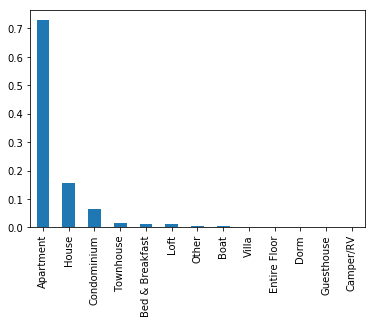

In [3]:
(listings['property_type'].value_counts()/listings.shape[0]).plot(kind='bar')

Most of the property are appartment (70%) <br> House come in second with (15%) and others types of property then

In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

**3.** adding month to reviews

In [5]:
import datetime
def adding_month(value):
    """ adding the month
    to the dataframe
    """
    months = ['Jan', 'Fev',
              'Mar','Apr',
              'May', 'Jun',
             'Jul', 'Aug',
              'Sep','Oct', 
              'Nov', 'Dec']
    value_converted = datetime.datetime.strptime(value, '%Y-%m-%d')
    return value_converted.month

reviews['months'] = reviews['date'].apply(adding_month)

def adding_season(value):
    """ adding season
    to the dataframe
    """
    if value>=6 and value<9:
        season = 'Summer'
    elif value>=3 and value<6:
        season = 'Automn'
    elif value==12 and value<3:
        season = 'Winter'
    else:
        season = 'Spring'
    return season
    

**4.** Let's see when people use to book houses in Boston


In [9]:
# getting price to compute mean
def compute_price(value):
    '''
    Convert to float the
    price value of pro-
    perty
    INPUT
    - price in dollar
    OUTPUT
    - price in float
    '''
    if isinstance(value,str):
        value_back = value.split('$')
        val = value_back[1]
        if ',' in val: #avoid ','
            val = val.replace(',','')
        return float(val)
    else:
        return float('NaN')
    


In [10]:
calendar_copy = calendar.copy()
calendar_copy['months'] = calendar['date'].apply(adding_month)
calendar_copy['season'] = calendar_copy['months'].apply(adding_season)

In [11]:
calendar_copy['real_price'] = calendar_copy['price'].apply(compute_price)

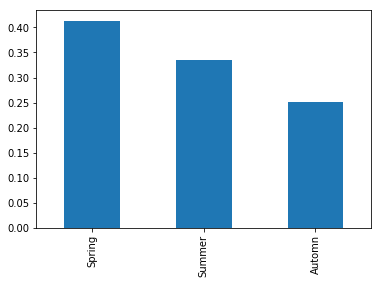

In [12]:
(calendar_copy['season'].value_counts()/calendar_copy.shape[0]).plot(kind = 'bar')

**Conclusion:**<br> People used to book property in the summer or before the summer not in Winter perhaps because they prefer good temperature to coolness

**5.** Get the average price according to season

In [13]:
calendar_copy.groupby(['season'])['real_price'].mean().dropna()

season
Automn    190.750467
Spring    196.860084
Summer    206.998642
Name: real_price, dtype: float64

The average price is bigger in summer and before summer in comparison to automn

**6** Create a function for our purposes and avoid repetition

In [35]:

def property_analysis(property_name, listings, calendar):
    '''
    add month and season of booking
    of the different property, then
    convert the price in dollar to
    float
    INPUT
    - property_name
    OUTPUT
    - calendar dataframe with addi-
    tionnal columnes
    '''
    property_type = listings[listings['property_type']==property_name]
    property_type.reset_index(inplace = True) 
    calendar_property_type = calendar.loc[calendar['listing_id'].isin(property_type['id'])]
    calendar_property_type_group = calendar_property_type.groupby('available')
    calendar_property_type_2 = calendar_property_type_group.get_group('t')
    calendar_property_type_2.index = np.arange(0, len(calendar_property_type_2))
    calendar_property_type_copy = calendar_property_type_2.copy()
    calendar_property_type_copy['months'] = calendar_property_type_copy['date'].apply(adding_month)
    calendar_property_type_copy['season'] = calendar_property_type_copy['months'].apply(adding_season)
    calendar_property_type_copy['real_price'] = calendar_property_type_copy['price'].apply(compute_price)
    return calendar_property_type_copy



**7.** Get more informations about each listings property

In [40]:

calendar_appartment = property_analysis('Apartment', listings, calendar)
calendar_house = property_analysis('House', listings, calendar)
#(calendar_appartment['season'].value_counts()/calendar_appartment.shape[0]).plot(kind = 'bar')

**8.** Price average per season for appartment

In [46]:
calendar_appartment.groupby(['season'])['real_price'].mean().dropna()

season
Automn    203.065283
Spring    212.919131
Summer    225.340707
Name: real_price, dtype: float64

**9.** Price average per season for houses

In [47]:
calendar_house.groupby(['season'])['real_price'].mean().dropna()

season
Automn    143.370350
Spring    136.640421
Summer    143.385668
Name: real_price, dtype: float64

**10.** Visualisation of appartments booking per season

Text(0.5,1,'Season of appartment booking')

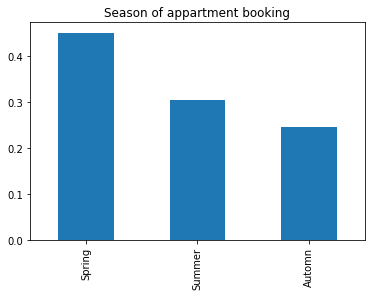

In [48]:
(calendar_appartment['season'].value_counts()/calendar_appartment.shape[0]).plot(kind='bar')
plt.title('Season of appartment booking')

Appartments as seen in **A look at the data** is the most demanded houses <br>
People mostly book in Spring and summer

**11.** Visualisation of houses booking per season

Text(0.5,1,'Season of house booking')

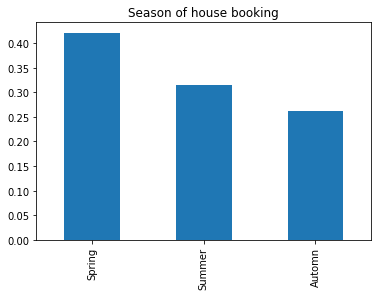

In [50]:
(calendar_house['season'].value_counts()/calendar_house.shape[0]).plot(kind='bar')
plt.title('Season of house booking')

Same conclusion for houses
the offer property types are not relevant